## DFT TESTBENCH

This notebook takes two inputs (real and imaginary) and gived the real and imaginary parts of the DFT outputs using AXI-STREAM. It is then compared with software version of FFT

In [15]:
from pynq import Overlay
import numpy as np
from pynq import Xlnk
from pynq.lib import dma
from scipy.linalg import dft
import matplotlib.pyplot as plt

In [16]:
ol=Overlay('design_1.bit')

In [17]:
dma1=ol.axi_dma_0


In [18]:
NUM_SAMPLES = 256

real_error=np.zeros(NUM_SAMPLES)
imag_error=np.zeros(NUM_SAMPLES)
ind=np.arange(NUM_SAMPLES)
real_rmse=np.zeros(NUM_SAMPLES)
imag_rmse=np.zeros(NUM_SAMPLES)

In [20]:
xlnk = Xlnk()
in_r = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.int8) 
out_r = xlnk.cma_array(shape=(NUM_SAMPLES,), dtype=np.int8) 


In [21]:


img1=np.random.randint(255,size=256)

for i in range(256): 
    img1[i] = i

np.copyto(in_r, img1)


In [22]:
length = NUM_SAMPLES
dft_ip = ol.ecc_encoder_0
dft_ip.write(0x00,1)
dma1.recvchannel.start()
dma1.sendchannel.start()

dma1.sendchannel.transfer(in_r)
dma1.recvchannel.transfer(out_r)

print("test")
dma1.sendchannel.wait()
print("test1")

dma1.recvchannel.wait()


test
test1


In [23]:
print(out_r)

[ 0 28 26  6 22 10 12 16 14 18 20  8 24  4  2 30 25  5  3 31 15 19 21  9 23
 11 13 17  1 29 27  7 21  9 15 19  3 31 25  5 27  7  1 29 13 17 23 11 12 16
 22 10 26  6  0 28  2 30 24  4 20  8 14 18 13 17 23 11 27  7  1 29  3 31 25
  5 21  9 15 19 20  8 14 18  2 30 24  4 26  6  0 28 12 16 22 10 24  4  2 30
 14 18 20  8 22 10 12 16  0 28 26  6  1 29 27  7 23 11 13 17 15 19 21  9 25
  5  3 31 19 15  9 21  5 25 31  3 29  1  7 27 11 23 17 13 10 22 16 12 28  0
  6 26  4 24 30  2 18 14  8 20  6 26 28  0 16 12 10 22  8 20 18 14 30  2  4
 24 31  3  5 25  9 21 19 15 17 13 11 23  7 27 29  1 30  2  4 24  8 20 18 14
 16 12 10 22  6 26 28  0  7 27 29  1 17 13 11 23  9 21 19 15 31  3  5 25 11
 23 17 13 29  1  7 27  5 25 31  3 19 15  9 21 18 14  8 20  4 24 30  2 28  0
  6 26 10 22 16 12]


In [9]:


edge= out_i.reshape(32,32)
full = img2.reshape(32,32) 

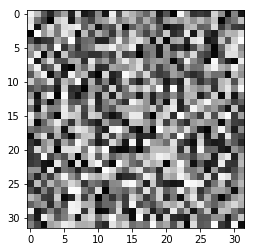

In [10]:
plt.imshow(full,cmap = 'gray');
plt.show()

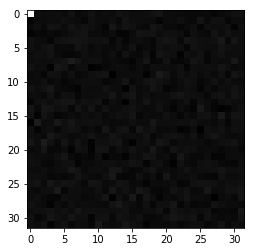

In [11]:
plt.imshow(edge,cmap = 'gray');
plt.show()

## Verifying Functionality 

In [7]:




golden_op=np.fft.fft(a)

for i in range(NUM_SAMPLES):

    real_error[i]="{0:.6f}".format(abs(out_r[i]-golden_op.real[i]))
    imag_error[i]="{0:.6f}".format(abs(out_i[i]-golden_op.imag[i]))

In [8]:
sum_sq_real=0
sum_sq_imag=0
for i in range(NUM_SAMPLES):
    sum_sq_real =sum_sq_real+(real_error[i]*real_error[i])
    real_rmse = np.sqrt(sum_sq_real / (i+1))
    sum_sq_imag =sum_sq_imag+(imag_error[i]*imag_error[i])
    imag_rmse = np.sqrt(sum_sq_imag / (i+1))
print("Real Part RMSE: ", real_rmse, "Imaginary Part RMSE:", imag_rmse)    
if real_rmse<0.001 and imag_rmse<0.001:
    print("PASS")
else:
    print("FAIL")

Real Part RMSE:  1.20132982955e-05 Imaginary Part RMSE: 4.89598847272e-06
PASS


## Displaying Error and Output

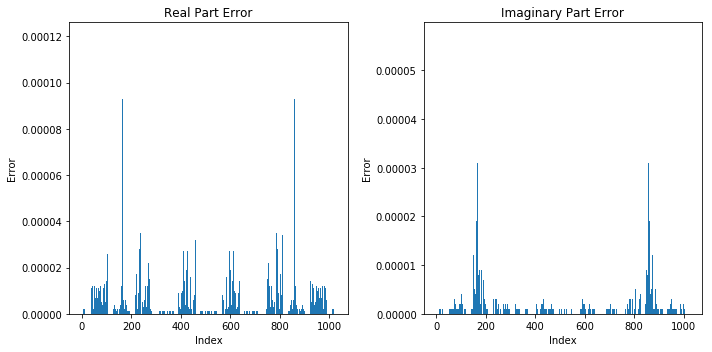

In [9]:
plt.figure(figsize=(10, 5))
plt.subplot(1,2,1)
plt.bar(ind,real_error)
plt.title("Real Part Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()

plt.subplot(1,2,2)
plt.bar(ind,imag_error)
plt.title("Imaginary Part Error")
plt.xlabel("Index")
plt.ylabel("Error")
#plt.xticks(ind)
plt.tight_layout()

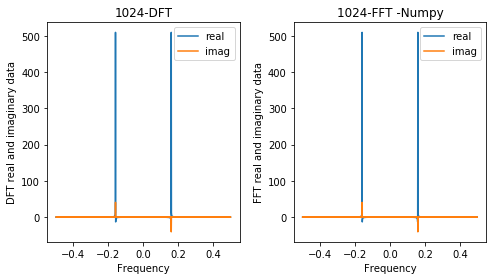

In [10]:
freq=np.fft.fftfreq(1024)

plt.figure(figsize=(7, 4))
plt.subplot(1,2,1)
plt.plot(freq,out_r,label='real')
plt.plot(freq,out_i,label='imag')
plt.title("1024-DFT")
plt.xlabel("Frequency")
plt.ylabel("DFT real and imaginary data")
plt.legend()
plt.tight_layout()
plt.subplot(1,2,2)
plt.plot(freq,golden_op.real,label='real')
plt.plot(freq,golden_op.imag,label='imag')
plt.title("1024-FFT -Numpy")
plt.xlabel("Frequency")
plt.ylabel("FFT real and imaginary data")
plt.legend()
plt.tight_layout()
plt.show()